In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import softmax
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
import statistics
import seaborn as sns
from modules.stats import *
from modules.PCA import *
from modules.LDA import *
from modules.read_data import *
from modules.LR import *
from modules.KNN import *
from modules.DTW import *
from modules.ROC import *

In [18]:
# ##LR

# path = 'Assets/Isolated Digits'
# data_class = ['2', '3', '4', '5', 'z']

# C = []; D = []
# B = []
# for i in data_class:
# 	C.append(read_digit(path, i, 'train')[1])
# 	D.append(read_digit(path, i, 'dev')[1])
# 	B.append(read_digit(path, i, 'dev')[0])

# C_y = []
# D_y = []

# for i in range(5):
# 	C_y.append(i * np.ones(len(C[i])))
# 	D_y.append(i * np.ones(len(D[i])))

# X =  np.concatenate(C, axis=0)
# X_d = np.concatenate(D, axis=0)
# Y = np.concatenate(C_y, axis=0)
# Y_d = np.concatenate(D_y, axis=0)

# pca = True
# lda = False
# lda = ~pca & lda #if pca is true then lda is false

# if pca:
# 	pc = 15
# 	μ, Σ = stats(X)
# 	eigval, Q = PCA(Σ, pc)
# 	X = X @ Q
# 	X_d = X_d @ Q
# if lda:
# 	pc = 15
# 	μ, Σ = stats(X)
# 	μk = []
# 	for c in range(5):
# 		μk.append(stats(X[Y == c])[0])
# 	μk = np.array(μk)
# 	v = LDA(X,Y,μ,μk,pc)
# 	X = np.abs(X @ v)
# 	X_d = np.abs(X_d @ v)

# if pca or lda:	
# 	C_new = []
# 	D_new = []
# 	nc=0
# 	nd=0
# 	for i in range(5):
# 		c = X[nc:nc+C[i].shape[0]]
# 		d = X_d[nd:nd+D[i].shape[0]]
# 		C_new.append(c)
# 		D_new.append(d)
# 		nc += C[i].shape[0]
# 		nd += D[i].shape[0]
# 	D = D_new
# 	C = C_new

# train_data = C; total_train = X 
# dev_data = D; total_dev = X_d
# #training LR
# loss_steps, w_ml = gradient_descent(train_data)

# #error vs iter 
# plt.plot(loss_steps['step'], loss_steps['error'])
# plt.xlabel('step'); plt.ylabel('error')

# #making prediction
# p = softmax(- total_dev @ w_ml, axis=1)
# t = np.argmax(p, axis=1)

P = []
for c in range(5):
    s = dev_data[c].shape[0]
    P.append(t[:s])
    t = np.delete(t, slice(s), 0)

#y_pred = np.vstack((P[0].reshape(-1,1), P[1].reshape(-1,1), P[2].reshape(-1,1), P[3].reshape(-1,1), P[4].reshape(-1,1))).flatten()

Yn_d = []
for c in range(5):
	Yn_d.append(c * np.ones(len(B[c])))
Yn_d = np.array(Yn_d)

yn_pred = np.zeros_like(Yn_d)
n = 0
for c in range(5):
	for i in range(len(B[c])):
		data = y_pred[n:n+B[c][i].shape[0]]
		n += B[c][i].shape[0]
		yn_pred[c][i] = statistics.mode(data)
cm = confusion_matrix(yn_pred.flatten(), Yn_d.flatten(),)
accuracy = accuracy_score(Yn_d.flatten(),yn_pred.flatten())
ax = sns.heatmap(cm, annot = True, cmap ='plasma',linecolor ='black', linewidths = 1, fmt = '.0f', xticklabels = data_class, yticklabels = data_class)
ax.set_title(f'Accuracy = {accuracy}\n')

TPR_dl1 = 0; FPR_dl1 = 0
for c in range(5):
	tpr, fpr = ROC(label_binarize(Y_d, classes=[0,1,2,3,4])[:,c], p[:,c])
	TPR_dl1 += tpr/5
	FPR_dl1 += fpr/5

StatisticsError: no mode for empty data

NameError: name 'TPR_d2' is not defined

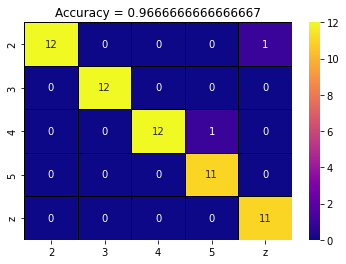

In [13]:
##KNN
path = 'Assets/Isolated Digits'
data_class = ['2', '3', '4', '5', 'z']

C = []; D = []
for i in data_class:
	C.append(read_digit(path, i, 'train')[0])
	D.append(read_digit(path, i, 'dev')[0])
C_y = []
D_y = []

for i in range(5):
	C_y.append(i * np.ones(len(C[i])))
	D_y.append(i * np.ones(len(D[i])))
Cn = []
Dn = []
for c in range(5):
	C_new = np.array(C[c][0])
	D_new = np.array(D[c][0])
	for i in range(1,len(C[c])):
		C_new = np.vstack((C_new, np.array(C[c][i])))
	for i in range(1,len(D[c])):
		D_new = np.vstack((D_new, np.array(D[c][i])))
	Cn.append(C_new)
	Dn.append(D_new)
Yn = []
Yn_d = []

for i in range(5):
	Yn.append(i * np.ones(len(Cn[i])))
	Yn_d.append(i * np.ones(len(Dn[i])))

Yn = np.concatenate(Yn, axis=0)
Yn_d = np.concatenate(Yn_d, axis=0)
X = np.concatenate(Cn, axis=0)
X_d = np.concatenate(Dn, axis=0)
Y = np.concatenate(C_y, axis=0)
Y_d = np.concatenate(D_y, axis=0)
pca = True
lda = False
lda = ~pca & lda #if pca is true then lda is false
if pca:
	pc = 15
	μ, Σ = stats(X)
	eigval, Q = PCA(Σ, pc)
	X = X @ Q
	X_d = X_d @ Q
if lda:
	pc = 15
	μ, Σ = stats(X)
	μk = []
	for c in range(5):
		μk.append(stats(X[Yn == c])[0])
	μk = np.array(μk)
	v = LDA(X,Yn,μ,μk,pc)
	X = np.abs(X @ v)
	X_d = np.abs(X_d @ v)
if pca or lda:
	cn = 0
	dn = 0
	C_new = []
	D_new = []
	for c in range(5):
		t = []
		d = []
		for i in range(len(C[c])):
			t.append(X[cn:cn+len(C[c][i])])
			cn += len(C[c][i])
		for i in range(len(D[c])):
			d.append(X_d[dn:dn+len(D[c][i])])
			dn += len(D[c][i])
		D_new.append(d)
		C_new.append(t)
	D = D_new
	C = C_new
P = []
for cl in range(5):
	p = []
	for dev in D[cl]:
		cost = []
		for c in range(5):
			for train in C[c]:
				cost.append([DTW(dev, train)[-1,-1], c])
		cost = np.array(cost)
		idx = cost[:,0].argsort()
		cost = cost[idx]
		p.append(cost[:, 1])
	P.append(p)
k = 10
Q = []
score = []
for c in range(5):
	q = []
	s = []
	for j in range(len(D[c])):
		data = P[c][j][:k]
		q.append(statistics.mode(data))
		s.append(np.array([(data==0).sum()/k, (data==1).sum()/k, (data==2).sum()/k, (data==3).sum()/k, (data==4).sum()/k]))
	Q.append(q)
	score.append(s)
y_pred = np.concatenate(Q)
score = np.concatenate(score)

cm = confusion_matrix(y_pred,Y_d)
accuracy = accuracy_score(Y_d,y_pred)
ax = sns.heatmap(cm, annot = True, cmap ='plasma',linecolor ='black', linewidths = 1, fmt = '.0f', xticklabels = data_class, yticklabels = data_class)
ax.set_title(f'Accuracy = {accuracy}')


In [14]:
TPR_d2 = 0; FPR_d2 = 0
for c in range(5):
	tpr, fpr = ROC(label_binarize(Y_d, classes=[0,1,2,3,4])[:,c], score[:,c])
	TPR_d2 += tpr/5
	FPR_d2 += fpr/5

In [15]:
%store TPR_d2
%store FPR_d2

Stored 'TPR_d2' (ndarray)
Stored 'FPR_d2' (ndarray)


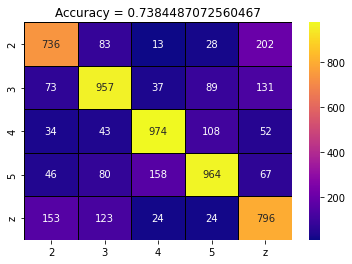

In [10]:
cm = confusion_matrix(y_pred,Y_d)
accuracy = accuracy_score(Y_d,y_pred)
ax = sns.heatmap(cm, annot = True, cmap ='plasma',linecolor ='black', linewidths = 1, fmt = '.0f', xticklabels = data_class, yticklabels = data_class)
ax.set_title(f'Accuracy = {accuracy}')
TPR2 = 0; FPR2 = 0
for c in range(5):
	tpr, fpr = ROC(label_binarize(Y_d, classes=[0,1,2,3,4])[:,c], score[:,c])
	TPR2 += tpr/5
	FPR2 += fpr/5

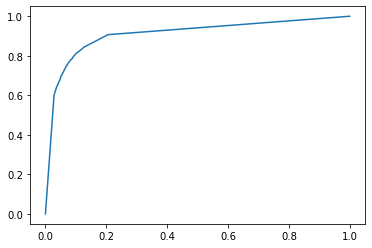

In [11]:
plt.plot(FPR2, TPR2)

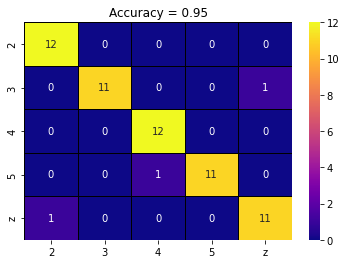

In [5]:
##SVM
from sklearn import svm
path = 'Assets/Isolated Digits'
data_class = ['2', '3', '4', '5', 'z']

C = []; D = []
B = []
for i in data_class:
	C.append(read_digit(path, i, 'train')[1])
	D.append(read_digit(path, i, 'dev')[1])
	B.append(read_digit(path, i, 'dev')[0])
C_y = []
D_y = []

for i in range(5):
	C_y.append(i * np.ones(C[i].shape[0]))
	D_y.append(i * np.ones(D[i].shape[0]))
X = np.concatenate(C, axis=0)
X_d = np.concatenate(D, axis=0)
Y = np.concatenate(C_y, axis=0)
Y_d = np.concatenate(D_y, axis=0)
pca = False
lda = False
lda = ~pca & lda #if pca is true then lda is false
if pca:
	pc = 15
	μ, Σ = stats(X)
	eigval, Q = PCA(Σ, pc)
	X = X @ Q
	X_d = X_d @ Q
if lda:
	pc = 15
	μ, Σ = stats(X)
	μk = []
	for c in range(5):
		μk.append(stats(X[Y == c])[0])
	μk = np.array(μk)
	v = LDA(X,Y,μ,μk,pc)
	X = np.abs(X @ v)
	X_d = np.abs(X_d @ v)
clf = svm.SVC(probability=True)
clf.fit(X, Y)
y_pred = clf.predict(X_d)
score = clf.predict_proba(X_d)
Yn_d = []
for c in range(5):
	Yn_d.append(c * np.ones(len(B[c])))
Yn_d = np.array(Yn_d)

yn_pred = np.zeros_like(Yn_d)
n = 0
for c in range(5):
	for i in range(len(B[c])):
		data = y_pred[n:n+B[c][i].shape[0]]
		n += B[c][i].shape[0]
		yn_pred[c][i] = statistics.mode(data)
cm = confusion_matrix(Yn_d.flatten(), yn_pred.flatten())
accuracy = accuracy_score(Yn_d.flatten(),yn_pred.flatten())
ax = sns.heatmap(cm, annot = True, cmap ='plasma',linecolor ='black', linewidths = 1, fmt = '.0f', xticklabels = data_class, yticklabels = data_class)
ax.set_title(f'Accuracy = {accuracy}')
TPR3 = 0; FPR3 = 0
for c in range(5):
	tpr, fpr = ROC(label_binarize(Y_d, classes=[0,1,2,3,4])[:,c], score[:,c])
	TPR3 += tpr/5
	FPR3 += fpr/5
# plt.plot(FPR, TPR)


Epoch 1/100


2022-05-03 19:20:43.979431: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


391/391 [==============================] - 2s 3ms/step - loss: 1.1470 - accuracy: 0.5406
Epoch 2/100
391/391 [==============================] - 1s 3ms/step - loss: 0.7109 - accuracy: 0.7377
Epoch 3/100
391/391 [==============================] - 1s 2ms/step - loss: 0.6017 - accuracy: 0.7835
Epoch 4/100
391/391 [==============================] - 1s 3ms/step - loss: 0.5232 - accuracy: 0.8105
Epoch 5/100
391/391 [==============================] - 1s 3ms/step - loss: 0.4707 - accuracy: 0.8289
Epoch 6/100
391/391 [==============================] - 1s 3ms/step - loss: 0.4341 - accuracy: 0.8442
Epoch 7/100
391/391 [==============================] - 1s 3ms/step - loss: 0.3904 - accuracy: 0.8605
Epoch 8/100
391/391 [==============================] - 1s 3ms/step - loss: 0.3564 - accuracy: 0.8730
Epoch 9/100
391/391 [==============================] - 1s 3ms/step - loss: 0.3376 - accuracy: 0.8789
Epoch 10/100
391/391 [==============================] - 1s 3ms/step - loss: 0.3078 - accuracy: 0.8896
E

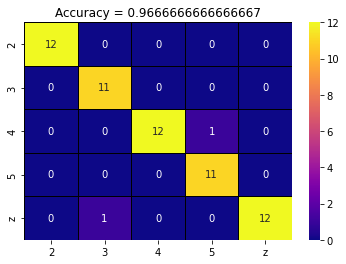

In [6]:
##ANN
from keras.models import Sequential
from keras.layers import Dense
path = 'Assets/Isolated Digits'
data_class = ['2', '3', '4', '5', 'z']

C = []; D = []
B = []
for i in data_class:
	C.append(read_digit(path, i, 'train')[1])
	D.append(read_digit(path, i, 'dev')[1])
	B.append(read_digit(path, i, 'dev')[0])
C_y = []
D_y = []

for i in range(5):
	C_y.append(i * np.ones(C[i].shape[0]))
	D_y.append(i * np.ones(D[i].shape[0]))
X = np.concatenate(C, axis=0)
X_d = np.concatenate(D, axis=0)
Y = np.concatenate(C_y, axis=0)
Y_d = np.concatenate(D_y, axis=0)
pca = False
lda = False
lda = ~pca & lda #if pca is true then lda is false
if pca:
	pc = 15
	μ, Σ = stats(X)
	eigval, Q = PCA(Σ, pc)
	X = X @ Q
	X_d = X_d @ Q
if lda:
	pc = 15
	μ, Σ = stats(X)
	μk = []
	for c in range(5):
		μk.append(stats(X[Y == c])[0])
	μk = np.array(μk)
	v = LDA(X,Y,μ,μk,pc)
	X = np.abs(X @ v)
	X_d = np.abs(X_d @ v)
classifier = Sequential()
classifier.add(Dense(512, input_shape=(X.shape[1],), kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(512, input_shape=(X.shape[1],), kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(5, kernel_initializer = 'uniform', activation = 'softmax'))
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
classifier.fit(X, label_binarize(Y, classes=[0,1,2,3,4]), batch_size = 50, epochs = 100)
score = classifier.predict(X_d)
y_pred = np.argmax(score,axis=1)
Yn_d = []
for c in range(5):
	Yn_d.append(c * np.ones(len(B[c])))
Yn_d = np.array(Yn_d)

yn_pred = np.zeros_like(Yn_d)
n = 0
for c in range(5):
	for i in range(len(B[c])):
		data = y_pred[n:n+B[c][i].shape[0]]
		n += B[c][i].shape[0]
		yn_pred[c][i] = statistics.mode(data)
cm = confusion_matrix(yn_pred.flatten(), Yn_d.flatten())
accuracy = accuracy_score(Yn_d.flatten(),yn_pred.flatten())
ax = sns.heatmap(cm, annot = True, cmap ='plasma',linecolor ='black', linewidths = 1, fmt = '.0f', xticklabels = data_class, yticklabels = data_class)
ax.set_title(f'Accuracy = {accuracy}')
TPR4 = 0; FPR4 = 0
for c in range(5):
	tpr, fpr = ROC(label_binarize(Y_d, classes=[0,1,2,3,4])[:,c], score[:,c])
	TPR4 += tpr/5
	FPR4 += fpr/5

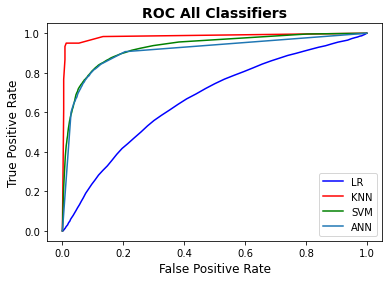

In [9]:
plt.plot(FPR1, TPR1, 'b')
plt.plot(FPR2, TPR2, 'r')
plt.plot(FPR3, TPR3, 'g')
plt.plot(FPR4, TPR4)
plt.xlabel('False Positive Rate',fontsize=12); plt.ylabel('True Positive Rate',fontsize=12)
plt.title('ROC All Classifiers',fontweight="bold", fontsize=14)
plt.legend(['LR', 'KNN', 'SVM', 'ANN'])